 # Credit Card Fraud Detection 

## Introduction: 

- When we make any transaction while purchasing any product online — a good amount of people prefer credit cards. The credit limit in credit cards sometimes helps us making purchases even if we don’t have the amount at that time. but, on the other hand, these features are misused by cyber attackers.

- To tackle this problem, we need a system that can abort the transaction if it finds fishy.

- Here, comes the need for a system that can track the pattern of all the transactions and if any pattern is abnormal then the transaction should be aborted.

- In this Project, I'll build a complete end-to-end machine learning models, that will track the pattern and classify whether it is fraud or not . 

# Importing Necessary Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns

from pandas_visual_analysis import VisualAnalysis
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve, accuracy_score
from sklearn.metrics import confusion_matrix,  precision_recall_curve


# Importing The Dataset

In [3]:
df = pd.read_csv('creditcard.csv') # loading the dataset

In [4]:
# To print start 10 rows
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,'0'
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,'0'
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,'0'
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,'0'
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,'0'


In [5]:
# To print last 10 rows
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,'0'
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,'0'
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,'0'
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,'0'
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,'0'
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,'0'
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,'0'
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,'0'
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,'0'
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,'0'


Column : 
 Time : 

# Data Processing and Understanding 

In [6]:
# To print the shape i.e. rows and columns of dataset
df.shape

(284807, 31)

In [7]:
# column names 
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# columns datatypes 
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class      object
dtype: object

In [9]:
# To print the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# Descriptive Statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


# Data Cleaning

In [11]:
# Checking for null or nan values 
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
df.isnull().sum().sum()

0

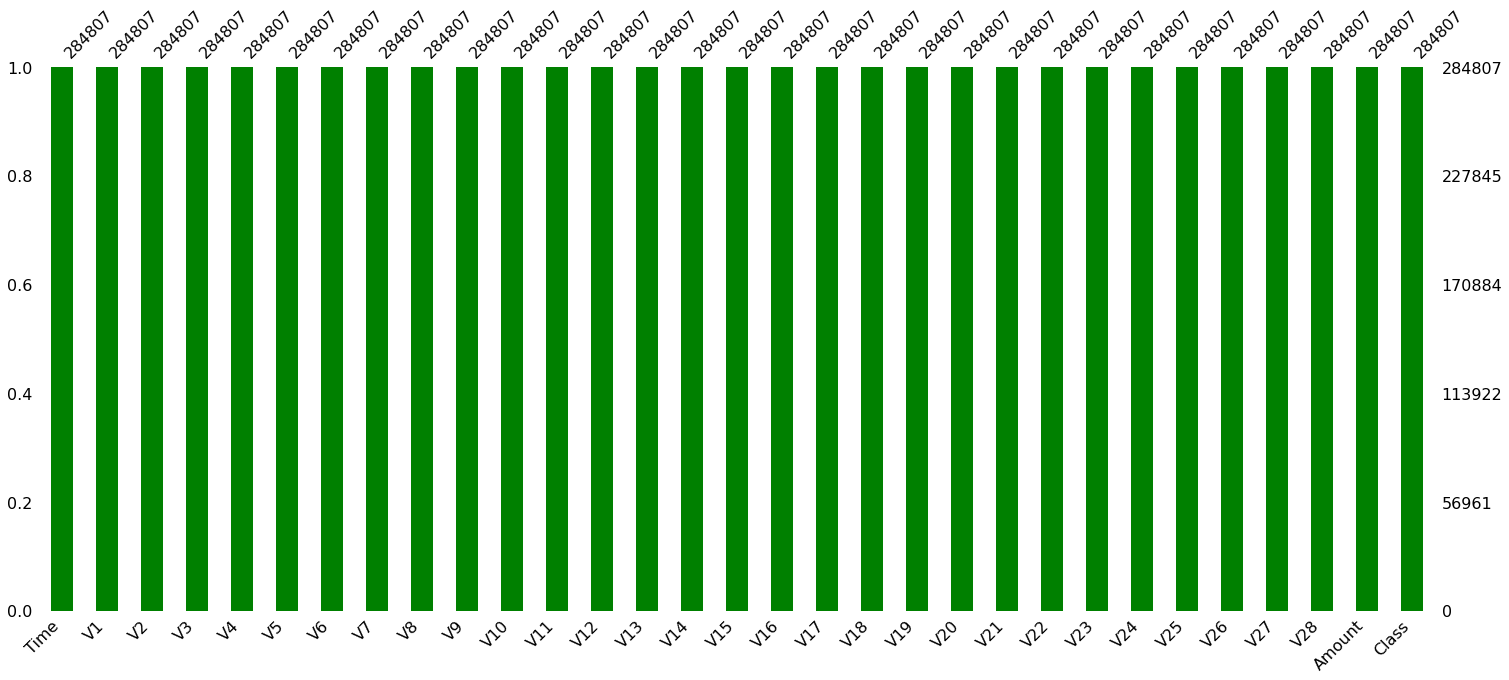

In [13]:
mns.bar(df,color = 'green')
plt.show()

# Exploratory Data Analysis

In [14]:
# Changing the Target i.e. Class to Label with rename()
df.rename(columns = {'Class':'Label'}, inplace = True, errors = {'raise'})

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [16]:
# Checking the Transaction details 
Total_transactions = len(df['Label'])
non_fraud = len(df[df.Label == 0])
fraud = len(df[df.Label == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Total No. of Transactions: ", Total_transactions)
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))


ZeroDivisionError: division by zero

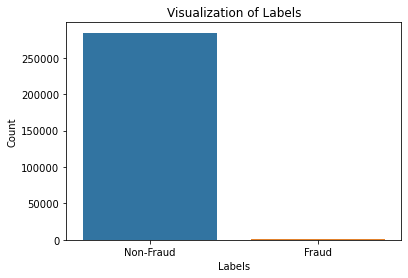

In [17]:
# To check How many frauds and non-frauds are there
labels = ["Non-Fraud", "Fraud"]
sns.countplot(data = df,x= 'Label')
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xlabel("Labels")
plt.xticks(range(2), labels)
plt.show()

# df.Label.value_counts(sort= True)
# count_classes.plot(kind = "bar", rot = 0)
# plt.title("Visualization of Labels")
# plt.ylabel("Count")
# plt.xlabel("Labels")
# plt.xticks(range(2), labels)
# plt.show()

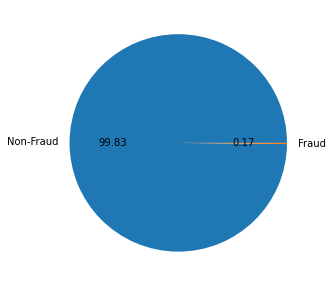

In [18]:
plt.figure(figsize=(15,5))
plt.pie(df['Label'].value_counts(), labels=labels, autopct="%.2f")
plt.show()

###### It is seen that The non-fraud transactions are over 99% !... So , we have to apply SMOTE 

# Scaling features

- So, Now Applying scaling techniques on the features “Amount & Time” to transform the range of values. 
- And dropping the original “Amount , Time” columns and adding the new columns with the scaled values.

In [19]:
df.Time.value_counts().sort_values(ascending = False).head(9)

163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
3750.0      19
19912.0     19
140347.0    19
128860.0    19
Name: Time, dtype: int64

In [20]:
df.Amount.value_counts().sort_values(ascending = False).head(10)

1.00     13688
1.98      6044
0.89      4872
9.99      4747
15.00     3280
0.76      2998
10.00     2950
1.29      2892
1.79      2623
0.99      2304
Name: Amount, dtype: int64

In [21]:
# We can also use StandardScaler to scale it. But RobustScaler is  better.
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Label,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0',1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0',-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0',4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0',1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0',0.670579,-0.994960


In [22]:
# removing the time and amount feature 
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [23]:
# changing the position of scaled_amount and scaled_time at the first 
Scaled_amount = df['scaled_amount']
Scaled_time = df['scaled_time']
df.insert(0, 'Scaled_amount',Scaled_amount)
df.insert(0, 'Scaled_time', Scaled_time)


In [24]:

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.head()

,Scaled_time,Scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Label
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,'0'
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,'0'
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,'0'
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,'0'
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,'0'


# Train & Test Split 

In [25]:
from sklearn.model_selection import train_test_split

# Defining independent and dependent variables to split train and test data
x = df.drop(["Label"], axis= 1)
y = df["Label"]

# spitting the training and testing data of both dependent and independent variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 42)

print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)
print("Shape of train_Y: ", y_train.shape)
print("Shape of test_Y: ", y_test.shape)


Shape of train_X:  (213605, 30)
Shape of test_X:  (71202, 30)
Shape of train_Y:  (213605,)
Shape of test_Y:  (71202,)


We import the models and make a function to print the classification report for each model.

# Model Building Without Smote

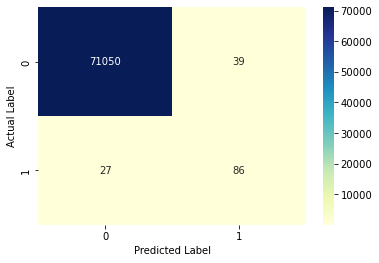

In [26]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

#### As we can clearly see it's a  very bad and bias result , Now we will apply SMOTE technique to balance the data. 

In [27]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))



Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 

After OverSampling, the shape of train_x: (426452, 30)
After OverSampling, the shape of train_y: (426452,) 



In [28]:
print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))


After OverSampling, counts of label '1', %: 0.0
After OverSampling, counts of label '0', %: 0.0


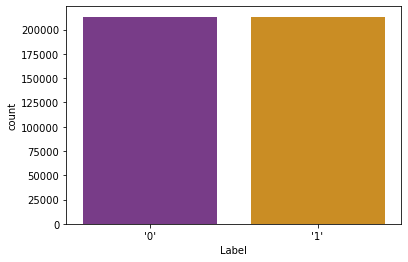

In [29]:
# Countplot to showcase the comparision
sns.countplot(x=y_train_s, data=df, palette='CMRmap')
plt.show()

#### Now , we will make a function for accuracy_score , precision_score, recall_score, f1_score .
##### Because in each model building , it is required , so by creating function it is easy.

In [30]:
# Defining a function that will give the scores of model whenever called 

from sklearn.metrics import precision_score, recall_score, f1_score,precision_recall_curve, accuracy_score

def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))


# Applying Models With SMOTE:


### 1- Decision Tree

In [31]:
# Impoprting Required libraries 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# defining 
dt = DecisionTreeClassifier()

# Fitting the model
dt.fit(x_train_s, y_train_s)

# making the predictions
y_pred = dt.predict(x_test)

# making of confusion matrix to draw a better result that is it overfitted or not ?
cnf_matrix = confusion_matrix(y_test, y_pred)

print('Evaluation of Decision Tree Model After SMOTE')
print()
# to show the scores of predictions
metrics(y_test, y_pred.round())

dt_f1_score = f1_score(y_test, y_pred)   # here f1_score is used in the last in comparision of the models


Evaluation of Decision Tree Model After SMOT



TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

In [ ]:
# plotting of heatmap to showcase the result in confusion matrix that is it overfitted or not ? 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Plotting the result curve with precision recall curve 
from sklearn.metrics import precision_recall_curve
y_pred_prob = dt.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### 2- Random Forest

In [ ]:
# importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Defining the classifier used. 
rf = RandomForestClassifier()

# fitting of model
rf.fit(x_train_s, y_train_s)

# making predictions
y_pred = rf.predict(x_test)

rf_cnf_matrix = confusion_matrix(y_test, y_pred)

print('Evaluation of Random Forest Model After SMOT')
print()
metrics(y_test, y_pred.round()) # to show the scores of predictions

rf_f1_score = f1_score(y_test, y_pred)  # here f1_score is used in the last in comparision of the models


In [ ]:
# plotting of heatmap to showcase the result of confusion matrix that is it overfitted or not ?

sns.heatmap(pd.DataFrame(rf_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Plotting the result curve  with precision recall curve 
from sklearn.metrics import precision_recall_curve
y_pred_prob = rf.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### 3- Logistic Regression

In [ ]:
# Importing libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# defining the classifier 
logreg = LogisticRegression(solver='liblinear')

# fitting of the defined model
logreg.fit(x_train_s, y_train_s)

# predictions
y_pred = logreg.predict(x_test)

# confusion matrix
logreg_cnf_matrix = confusion_matrix(y_test, y_pred)

 # to show the scores of predictions
print('Evaluation of Logistic Regression Model After SMOT')
print()
metrics(y_test, y_pred.round())


logreg_f1_score = f1_score(y_test, y_pred)   # here f1_score is used in the last in comparision of the models

In [ ]:
# plotting of heatmap to showcase the result of confusion matrix that is it overfitted or not ?

sns.heatmap(pd.DataFrame(logreg_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
# Plotting the result curve with precision_recall_curve
from sklearn.metrics import precision_recall_curve

y_pred_prob = logreg.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### Feature Importance 
###### We are doing feature importance by using Random Forest Classifier

In [ ]:
print('Feature importance ranking\n\n')
print()
importances = rf.feature_importances_  # rf is already defined as randomforestclassifier()

std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

variables = df.columns
importance_list = []

for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))


In [ ]:
# plotting of the important feature first 
plt.figure(figsize=(20, 8))
plt.title("Feature importances", fontsize = 30)
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')
plt.xticks(rotation = 60)
plt.xlabel('Features', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

### 4 - Bagging
- bagging is used to imporove the accuracy and stability of ml algorithms 
- It will reduce the variance 

In [ ]:
# Importing  require libraries
from sklearn.ensemble import BaggingClassifier

# Defining the classifier
bc = BaggingClassifier()

# fitting of the model with scaled train data
bc.fit(x_train_s, y_train_s)

# predictions with testing data i.e. x_test
y_pred = bc.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# calling the metrics function which is for scores 
print('Evaluation of Bagging Classifire Model After SMOT')
print()
metrics(y_test, y_pred.round())  

bc_f1_score = f1_score(y_test, y_pred)  # here f1_score is used in the last in comparision of the models


In [ ]:
# plotting the confusion matrix to showcase the result that is it overfitted or not ?
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
## Plotting the result curve with precision_recall_curve
y_pred_prob = bc.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

### 5- XGBoost Algorithm 

In [ ]:
# Importing Required Libraries
from xgboost import XGBClassifier

#defining
xgb = XGBClassifier(max_depth = 5)

# fitting of the model with scaled train data
xgb.fit(x_train_s, y_train_s)

# predictions with testing data i.e. x_test
y_pred = xgb.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

# calling the metrics function which is for scores 
print('Evaluation of XGBoost Classifier Model After SMOT')
print()
metrics(y_test, y_pred.round())  

xgb_f1_score = f1_score(y_test, y_pred)  # here f1_score is used in the last in comparision of the models


In [ ]:
# plotting the confusion matrix to showcase the result that is it overfitted or not ?
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Plotting the result curve with precision_recall_curve
from sklearn.metrics import precision_recall_curve

y_pred_prob = xgb.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

# Comparision of Models

- Now at last, comparing the algorithms to find out that which has given the best result. 


In [ ]:
# here , a dataframe has been created with all the models applied .
results = pd.DataFrame({
    'Model': ['Logistic Regression',' XBBoost Classifier', 'Decision Tree', 
              'Random Forest', 'Bagging Classifier'],
    'Score': [ logreg_f1_score, xgb_f1_score, dt_f1_score,
              rf_f1_score, bc_f1_score]
})

# I have compared them by calculating the f1_scores , it can also be done by accuracy or any type of score.
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)



In [ ]:
# Plotting the barplot to showcase the result which algorithm is best. 
names = ['Decision Tree', 'Random Forest', 'XGBoost','Logistic Regression', 'Bagging Classifier']
results = [dt_f1_score, rf_f1_score, xgb_f1_score, logreg_f1_score, bc_f1_score]
plt.figure(figsize=(10,6))
plt.bar(names,results)
plt.xlabel("Models", fontsize=16) #setting the xtitle and size
plt.ylabel("Scores", fontsize=16) # Setting the ytitle and size
plt.title("Comparison Between Models", fontsize=20)
plt.show()


In [ ]:
 
plt.figure(figsize=(15,5))
plt.pie(results, labels = names, autopct="%.2f")
plt.show()

# Conclusion:
1. Implementing SMOTE Technique on our imbalanced dataset helped us to balanced the data.
2. Also, implementing confusion matrix at stage of model building , to check that model is not overfitted. 
2. Trying more algorithms and atlast comparing between them shows us which algorithm is best suited to this project . 
3. After comparison between models, we found that RandomForestClassifier gave us the best result.
4. The best accuracy : 99.951% 
    and the f1_score : 84.58%  